In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

data_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
# data_z = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.83.rf', 'r')
data_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.155-161.rf', 'r')
data_muzzin_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
data_muzzin_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
data_g = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
# lines_z = data_z.readlines()[10:]
lines_UV = data_UV.readlines()[11:]
lines_VJ = data_VJ.readlines()[11:]
lines_muzzin_UV = data_muzzin_UV.readlines()[11:]
lines_muzzin_VJ = data_muzzin_VJ.readlines()[11:]
lines_g = data_g.readlines()[11:]

# print(lines)

redshift_g = []
DM_g = []
gfilter = []
for line in lines_g:
    q = line.split()
    redshift_g.append(float(q[1]))
    DM_g.append(float(q[2]))
    gfilter.append(float(q[5]))

zspec = np.array(redshift_g)
DMarr_g = np.array(DM_g)
gflux = np.array(gfilter)    

# z = []
DM_UV = []
# DM_z = []
DM_VJ = []
Ufilter_UV = []
Vfilter_UV = []
# Ufilter_muzzin_UV = []
# Vfilter_muzzin_UV = []
# zfilter = []
# Vfilter_VJ = []
# Jfilter_VJ = []
# Vfilter_muzzin_VJ = []
# Jfilter_muzzin_VJ = []

for line in lines_UV:
    p = line.split()
#     z.append(float(p[1]))
#     redshift_UV.append(float(p[1]))
    DM_UV.append(float(p[2]))
    Ufilter_UV.append(float(p[5]))
    Vfilter_UV.append(float(p[6]))
    
# for line in lines_muzzin_UV:
#     p = line.split()
# #     z.append(float(p[1]))
# #     redshift_UV.append(float(p[1]))
# #     DM_UV.append(float(p[2]))
#     Ufilter_muzzin_UV.append(float(p[5]))
#     Vfilter_muzzin_UV.append(float(p[6]))
    
# for line in lines_z:
#     q = line.split()
# #     redshift_z.append(float())
#     DM_z.append(float(q[2]))
#     zfilter.append(float(q[5]))
    
# for line in lines_VJ:
#     r = line.split()
# #     redshift_z.append(float())
#     DM_VJ.append(float(r[2]))
#     Vfilter_VJ.append(float(r[5]))
#     Jfilter_VJ.append(float(r[6]))
    
# for line in lines_muzzin_VJ:
#     r = line.split()
# #     redshift_z.append(float())
# #     DM_VJ.append(float(r[2]))
#     Vfilter_muzzin_VJ.append(float(r[5]))
#     Jfilter_muzzin_VJ.append(float(r[6]))
    

# zspec = np.array(z)
DMarr_UV = np.array(DM_UV)
# DMarr_z = np.array(DM_z)
# DMarr_VJ = np.array(DM_VJ)
# zflux = np.array(zfilter)
Uflux_UV = np.array(Ufilter_UV)
Vflux_UV = np.array(Vfilter_UV)
# Uflux_muzzin_UV = np.array(Ufilter_muzzin_UV)
# Vflux_muzzin_UV = np.array(Vfilter_muzzin_UV)
# Vflux_VJ = np.array(Vfilter_VJ)
# Jflux_VJ = np.array(Jfilter_VJ)
# Vflux_muzzin_VJ = np.array(Vfilter_muzzin_VJ)
# Jflux_muzzin_VJ = np.array(Jfilter_muzzin_VJ)


# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']
star = data_cat['star']
contamination = data_cat['contamination']
nan_contam = data_cat['nan_contam']
# z = data_cat['z_spec']

cut = np.where((use == 1.) & (star == 0.) & (contamination == 0.) & (nan_contam < 3.)) # & (Uflux > 0.) & (Vflux > 0.) & (zflux > 0.)) # & (zp > 0.))

gmag = np.array(25. - 2.5 * np.log10(gp[cut]))
zmag = np.array(25. - 2.5 * np.log10(zp[cut]))
z = np.array(zspec[cut])
DM = np.array(DMarr_g[cut])
flux_g = np.array(gflux[cut])
DM_UV = np.array(DMarr_UV[cut])
Uflux = np.array(Uflux_UV[cut])
Vflux = np.array(Vflux_UV[cut])
# print(len(gmag))
# print(len(zp))

# print(len(gflux))
# print(len(gflux[cut]))
# print(type(gmag))
# print(len(gmag))
# plt.hist(zmag[np.where(zmag > 0)])
# plt.show()
# print(len(zmag[np.where(zmag < 0.)]))

gmag_cut = gmag[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
zmag_cut = zmag[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
zspec_cut = z[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
DM_cut = DM[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
gflux_cut = flux_g[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
print(len(gmag_cut))
print(len(zmag_cut))
print(len(zspec_cut))
print(len(DM_cut))
print(len(gflux_cut))
DM_UV_cut = DM_UV[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
Uflux_cut = Uflux[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
Vflux_cut = Vflux[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
print(len(DM_UV_cut))
print(len(Uflux_cut))
print(len(Vflux_cut))


164011
164011
164011
164011
164011
164011
164011
164011


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in log10
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in log10
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in log10


In [3]:
# Calculate (U-V) color and rest frame Vmag

# K correction
K_correct = -2.5*np.log10(1. + zspec_cut)

# (U-V) color
UVcolor = -2.5*np.log10(Uflux_cut/Vflux_cut)
# VJcolor = -2.5*np.log10(Vflux_VJ[cut]/Jflux_VJ[cut])

# UVcolor_muzzin = -2.5*np.log10(Uflux_muzzin_UV[cut]/Vflux_muzzin_UV[cut])
# VJcolor_muzzin = -2.5*np.log10(Vflux_muzzin_VJ[cut]/Jflux_muzzin_VJ[cut])

# Absolute magnitude
MV = -2.5*np.log10(Vflux_cut) + 25. - DM_UV_cut - K_correct
MU = -2.5*np.log10(Uflux_cut) + 25. - DM_UV_cut - K_correct
# zMag = -2.5*np.log10(zflux[cut]) + 25. - DMarr_z[cut] - K_correct
# MJ = -2.5*np.log10(Jflux[cut]) + 25. - DMarr_J[cut] - K_correct

# V band magnitude of the sun
Msun_V = 4.80 # AB magnitude

# Luminosity
LV = 10.**((MV-Msun_V)/(-2.5))

log_LV = np.log10(LV)


# Calculate rest frame gmag

# Msun_z = 4.50
Msun_g = 5.05


gMag = -2.5*np.log10(gflux_cut) + 25. - DM_cut - K_correct
gLum = 10.**((gMag-Msun_g)/(-2.5))

log_gLum = np.log10(gLum)

# print(type(log_LV))
print(type(log_gLum))

# print(log_zLum[np.where(log_zLum != 'nan')])
# print(log_LV[np.where(log_LV != 'nan')])

<class 'numpy.ndarray'>


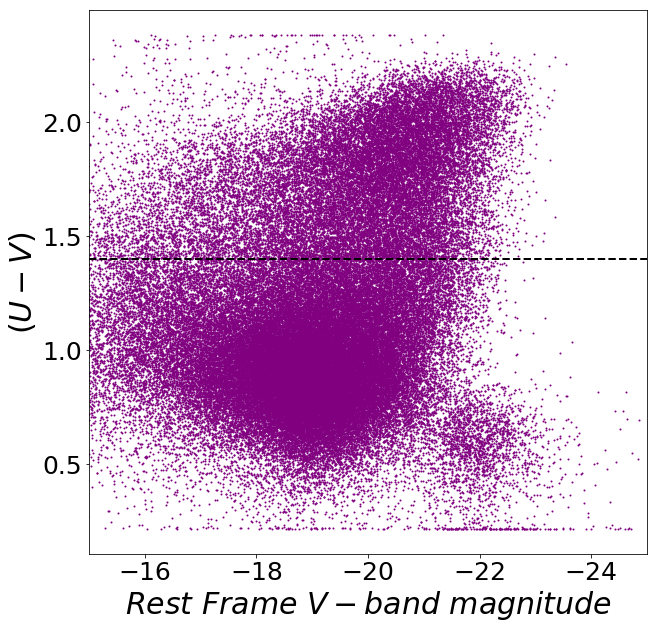

In [4]:
# Plot (U-V) vs. V

# zphot = zspec[np.where((Uflux_cut > 0) & (Vflux_cut > 0) & (use == 1) & (zspec_cut > 0.1))]

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
ax.scatter(MV[np.where(zspec_cut < 1)], UVcolor[np.where(zspec_cut < 1)], s=1, c='purple')
# plt.title("UVista (U-V) vs V (z < 1)", fontsize=22)
plt.xlabel(r'$Rest$ $Frame$ $V-band$ $magnitude$', fontsize=30)
plt.ylabel(r'$(U-V)$', fontsize=30)
plt.xlim(-25, -15)
plt.axhline(y=1.4, color='black', linewidth=2, ls='--')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/U-V_CMD-v7.pdf')
plt.show()


# # Plot redshift distribution

# f, ax = plt.subplots(figsize=(10,10))
# ax.hist(zphot, bins=50, color='purple')
# plt.title("UVista Redshift Distribution", fontsize=22)
# plt.xlabel(r'$redshift$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.pdf')
# plt.show()

# Plot UVJ

# print(len(VJcolor[np.where(VJcolor == 0)]))
# print(len(VJcolor[np.where(VJcolor > 0)]))

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor, UVcolor, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor_muzzin, UVcolor_muzzin, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

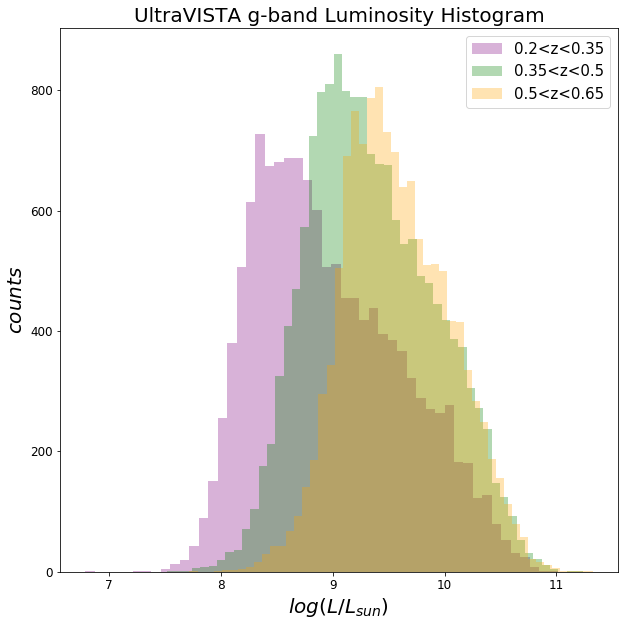

In [5]:
plt.subplots(figsize=(10,10))

plt.hist(log_gLum[np.where((zspec_cut > 0.2) & (zspec_cut < 0.35))], bins=50, alpha=0.3, color='purple', label="0.2<z<0.35") #, normed='True')
plt.hist(log_gLum[np.where((zspec_cut > 0.35) & (zspec_cut < 0.5))], bins=50, alpha=0.3, color='green', label="0.35<z<0.5") #, normed='True')
plt.hist(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut < 0.65))], bins=50, alpha=0.3, color='orange', label="0.5<z<0.65") #, normed='True')

plt.title("UltraVISTA g-band Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/UV_glum_hist_redshift_cut-v2.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/UV_glum_hist_redshift_cut-v2.pdf')
plt.show()

# plt.scatter(log_zLum, zspec[cut])
# plt.show()


<class 'numpy.ndarray'>
41920


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


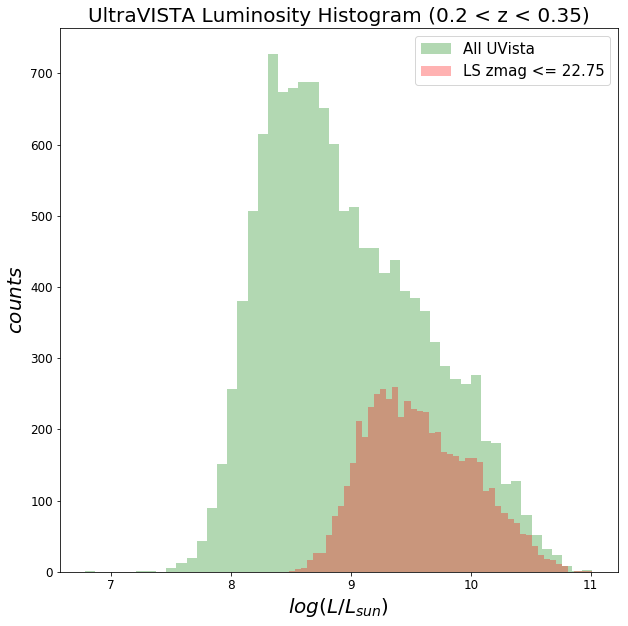

In [14]:
print(type(zmag))
# print(len(log_zLum))
print(len(zmag[np.where(zmag < 22.75)]))

plt.subplots(figsize=(10,10))
plt.hist(log_gLum[np.where((zspec_cut > 0.2) & (zspec_cut < 0.35))], bins=50, alpha=0.3, color='green', label='All UVista')
plt.hist(log_gLum[np.where((zspec_cut > 0.2) & (zspec_cut < 0.35) & (zmag_cut <= 22.75))], bins=50, alpha=0.3, color='red', label="LS zmag <= 22.75")
# plt.title("UltraVISTA Luminosity Histogram (0.2 < z < 0.35 + LS zmag cuts)", fontsize=20)
plt.title("UltraVISTA Luminosity Histogram (0.2 < z < 0.35)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# 
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_LSzmag_cut-v1.pdf')
plt.show()


[ 7.71704896  7.78917823  7.8613075   7.93343677  8.00556604  8.07769532
  8.14982459  8.22195386  8.29408313  8.3662124   8.43834167  8.51047095
  8.58260022  8.65472949  8.72685876  8.79898803  8.8711173   8.94324658
  9.01537585  9.08750512  9.15963439  9.23176366  9.30389293  9.37602221
  9.44815148  9.52028075  9.59241002  9.66453929  9.73666856  9.80879784
  9.88092711  9.95305638 10.02518565 10.09731492 10.16944419 10.24157347
 10.31370274 10.38583201 10.45796128 10.53009055 10.60221982 10.6743491
 10.74647837 10.81860764 10.89073691 10.96286618 11.03499545 11.10712473
 11.179254   11.25138327 11.32351254]
----
[0.                nan        nan 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00140647 0.00762389 0.03473945
 0.11202186 0.24355301 0.4765625  0.70307692 0.86775362 0.95890411
 0.9921875  0.99599198 1.         1.         1.         1.
 1. 

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


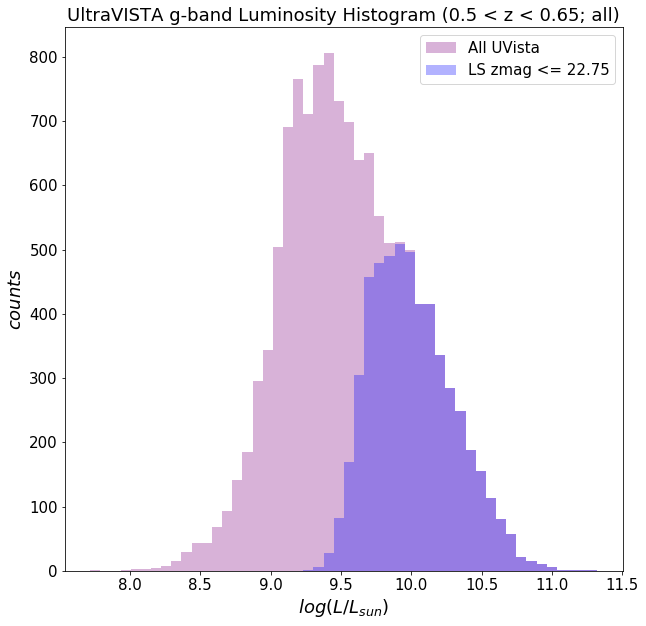

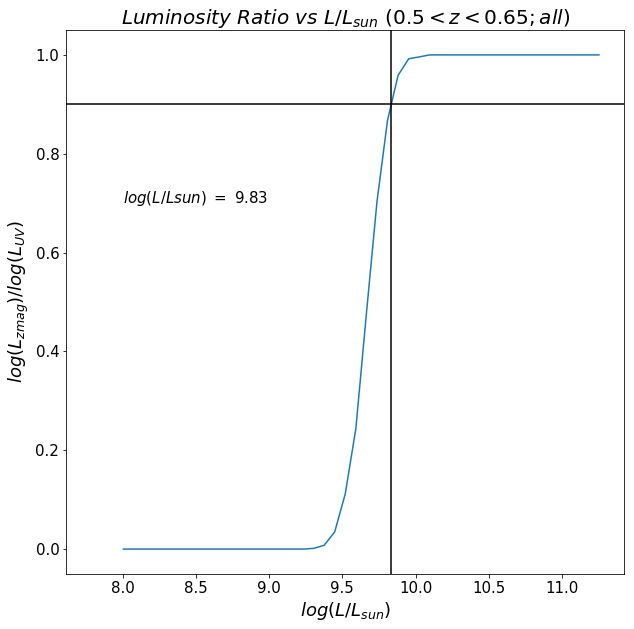

In [109]:
# Make completeness cuts in the z-band for combined red and blue sources

UV_zcut_all, zcut_bins_all = np.histogram(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut <= 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut <= 0.65) & (zmag_cut <= 22.75))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut <= 0.65))], bins=zcut_bins_all, alpha=0.3, color='purple', label="All UVista")
plt.hist(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut <= 0.65) & (zmag_cut <= 22.75))], bins=zcut_bins_all, alpha=0.3, color='blue', label="LS zmag <= 22.75")
plt.title("UltraVISTA g-band Luminosity Histogram (0.5 < z < 0.65; all)", fontsize=18)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
plt.ylabel(r'$counts$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/high-luminosity-hist-all.pdf')
plt.show()

# 0.2 < z < 0.35
# bins_minus_one = [6.86991908,  6.95450134,  7.0390836,   7.12366586,  7.20824812,
#   7.29283037,  7.37741263,  7.46199489,  7.54657715,  7.6311594,   7.71574166,
#   7.80032392,  7.88490618,  7.96948844,  8.05407069,  8.13865295,  8.22323521,
#   8.30781747,  8.39239972,  8.47698198,  8.56156424,  8.6461465,   8.73072875,
#   8.81531101,  8.89989327,  8.98447553,  9.06905779,  9.15364004,  9.2382223,
#   9.32280456,  9.40738682,  9.49196907,  9.57655133,  9.66113359,  9.74571585,
#   9.8302981,   9.91488036,  9.99946262, 10.08404488, 10.16862714, 10.25320939,
#  10.33779165, 10.42237391, 10.50695617, 10.59153842, 10.67612068, 10.76070294,
#  10.8452852,  10.92986745]

# # 0.35 < z < 0.5
# bins_minus_one = [7.5911787,   7.66565698,  7.74013527,  7.81461356,  7.88909185,
#   7.96357013,  8.03804842,  8.11252671,  8.18700499,  8.26148328,  8.33596157,
#   8.41043986,  8.48491814,  8.55939643,  8.63387472,  8.70835301,  8.78283129,
#   8.85730958,  8.93178787,  9.00626615,  9.08074444,  9.15522273,  9.22970102,
#   9.3041793,   9.37865759,  9.45313588,  9.52761416,  9.60209245,  9.67657074,
#   9.75104903,  9.82552731,  9.9000056,   9.97448389, 10.04896218, 10.12344046,
#  10.19791875, 10.27239704, 10.34687532, 10.42135361, 10.4958319,  10.57031019,
#  10.64478847, 10.71926676, 10.79374505, 10.86822333, 10.94270162, 11.01717991,
#  11.0916582,  11.16613648]

# 0.5 < z < 0.65
bins_minus_one = [7.78917823,  7.8613075,   7.93343677,  8.00556604,  8.07769532,
  8.14982459,  8.22195386,  8.29408313,  8.3662124,   8.43834167,  8.51047095,
  8.58260022,  8.65472949,  8.72685876,  8.79898803,  8.8711173,   8.94324658,
  9.01537585,  9.08750512,  9.15963439,  9.23176366,  9.30389293,  9.37602221,
  9.44815148,  9.52028075,  9.59241002,  9.66453929,  9.73666856,  9.80879784,
  9.88092711,  9.95305638, 10.02518565, 10.09731492, 10.16944419, 10.24157347,
 10.31370274, 10.38583201, 10.45796128, 10.53009055, 10.60221982, 10.6743491,
 10.74647837, 10.81860764, 10.89073691, 10.96286618, 11.03499545, 11.10712473,
 11.179254,   11.25138327]



fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='black')
plt.axvline(x=9.83, color='black')
plt.title("$Luminosity$ $Ratio$ $vs$ $L/L_{sun}$ $(0.5 < z < 0.65; all)$", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
plt.ylabel(r'$log(L_{zmag})/log(L_{UV})$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.text(8., 0.7, '$log(L/L{sun})$ $=$ $9.83$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/high-lum_ratio-vs_lum-all.pdf')
fig.show()


In [131]:
# zLum_cut = log_zLum[cut]

log_gLum_blue_LS = log_gLum[np.where((UVcolor < 1.4) & (zspec_cut > 0.35) & (zspec_cut <= 0.5) & (zmag_cut <= 22.75))]
log_gLum_red_LS = log_gLum[np.where((UVcolor > 1.4) & (zspec_cut > 0.35) & (zspec_cut <= 0.5) & (zmag_cut <= 22.75))]

log_gLum_blue_z = log_gLum[np.where((UVcolor < 1.4) & (zspec_cut > 0.35) & (zspec_cut <= 0.5))]
log_gLum_red_z = log_gLum[np.where((UVcolor > 1.4) & (zspec_cut > 0.35) & (zspec_cut <= 0.5))]
   
    
print(len(log_gLum_blue_LS))
print(len(log_gLum_red_LS))
print(len(log_gLum_blue_z))
print(len(log_gLum_red_z))

3996
3393
10942
4705


[ 7.61163415  7.68421376  7.75679337  7.82937299  7.9019526   7.97453221
  8.04711182  8.11969144  8.19227105  8.26485066  8.33743027  8.41000989
  8.4825895   8.55516911  8.62774872  8.70032834  8.77290795  8.84548756
  8.91806717  8.99064679  9.0632264   9.13580601  9.20838562  9.28096524
  9.35354485  9.42612446  9.49870407  9.57128369  9.6438633   9.71644291
  9.78902252  9.86160213  9.93418175 10.00676136 10.07934097 10.15192058
 10.2245002  10.29707981 10.36965942 10.44223903 10.51481865 10.58739826
 10.65997787 10.73255748 10.8051371  10.87771671 10.95029632 11.02287593
 11.09545555 11.16803516 11.24061477]
----
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.10091743 0.27835052 0.50574713 0.60714286 0.83478261
 0.96       0.98170732 0.99324324 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


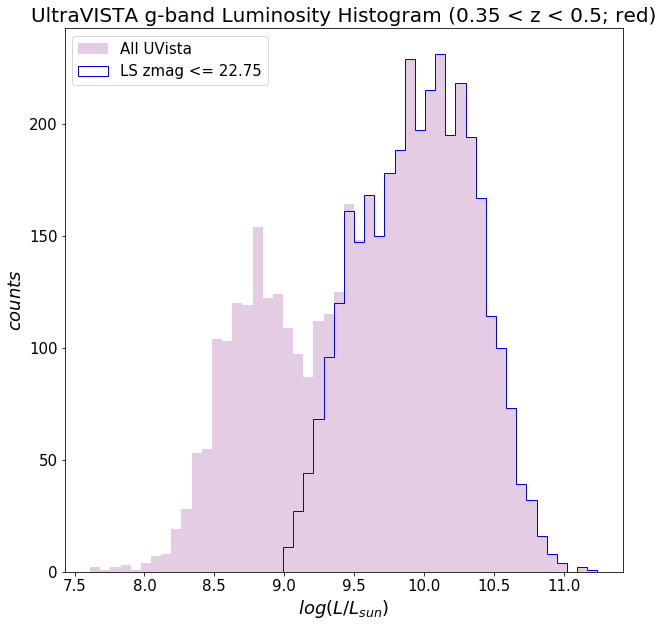

In [133]:
UV_zcut_red, zcut_bins_red = np.histogram(log_gLum_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_gLum_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum_red_z, bins=zcut_bins_red, alpha=0.2, color='purple', label="All UVista")
plt.hist(log_gLum_red_LS, bins=zcut_bins_red, histtype='step', color='blue', label="LS zmag <= 22.75")
plt.title("UltraVISTA g-band Luminosity Histogram (0.35 < z < 0.5; red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
plt.ylabel(r'$counts$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/mid-luminosity-hist-red.pdf')
plt.show()

# # 0.2 < z < 0.35
# bins_minus_one = [7.6392645,   7.70814583,  7.77702716,  7.84590849,  7.91478982,
#   7.98367115,  8.05255248,  8.12143381,  8.19031514,  8.25919647,  8.32807781,
#   8.39695914,  8.46584047,  8.5347218,   8.60360313,  8.67248446,  8.74136579,
#   8.81024712,  8.87912845,  8.94800978,  9.01689111,  9.08577245,  9.15465378,
#   9.22353511,  9.29241644,  9.36129777,  9.4301791,   9.49906043,  9.56794176,
#   9.63682309,  9.70570442,  9.77458576,  9.84346709,  9.91234842,  9.98122975,
#  10.05011108, 10.11899241, 10.18787374, 10.25675507, 10.3256364,  10.39451773,
#  10.46339906, 10.5322804,  10.60116173, 10.67004306, 10.73892439, 10.80780572,
#  10.87668705, 10.94556838]

# # 0.35 < z < 0.5
# bins_minus_one = [7.68421376,  7.75679337,  7.82937299,  7.9019526,   7.97453221,
#   8.04711182,  8.11969144,  8.19227105,  8.26485066,  8.33743027,  8.41000989,
#   8.4825895,   8.55516911,  8.62774872,  8.70032834,  8.77290795,  8.84548756,
#   8.91806717,  8.99064679,  9.0632264,   9.13580601,  9.20838562,  9.28096524,
#   9.35354485,  9.42612446,  9.49870407,  9.57128369,  9.6438633,   9.71644291,
#   9.78902252,  9.86160213,  9.93418175, 10.00676136, 10.07934097, 10.15192058,
#  10.2245002,  10.29707981, 10.36965942, 10.44223903, 10.51481865, 10.58739826,
#  10.65997787, 10.73255748, 10.8051371,  10.87771671, 10.95029632, 11.02287593,
#  11.09545555, 11.16803516]

# 0.5 < z < 0.65
# bins_minus_one = [8.07460975,  8.13491639,  8.19522302,  8.25552966,  8.31583629,
#   8.37614293,  8.43644956,  8.4967562,   8.55706284,  8.61736947,  8.67767611,
#   8.73798274,  8.79828938,  8.85859601,  8.91890265,  8.97920929,  9.03951592,
#   9.09982256,  9.16012919,  9.22043583,  9.28074247,  9.3410491,   9.40135574,
#   9.46166237,  9.52196901,  9.58227564,  9.64258228,  9.70288892,  9.76319555,
#   9.82350219,  9.88380882,  9.94411546, 10.00442209, 10.06472873, 10.12503537,
#  10.185342,   10.24564864, 10.30595527, 10.36626191, 10.42656855, 10.48687518,
#  10.54718182, 10.60748845, 10.66779509, 10.72810172, 10.78840836, 10.848715,
#  10.90902163, 10.96932827]


# fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(bins_minus_one, ratio_red[:-1])

# plt.axhline(y=0.9, color='black')
# plt.axvline(x=9.69, color='black')
# plt.title("$Luminosity$ $Ratio$ $vs$ $L/L_{sun}$ $(0.5 < z < 0.65;$ $red)$", fontsize=20)
# plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
# plt.ylabel(r'$log(L_{zmag})/log(L_{UV})$', fontsize=18)
# plt.tick_params(axis='both', which='major', labelsize=15)
# plt.text(8.4, 0.7, '$log(L/L{sun})$ $=$ $9.69$', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/high-lum_ratio-vs_lum-red.pdf')
# fig.show()



[ 7.71704896  7.78917823  7.8613075   7.93343677  8.00556604  8.07769532
  8.14982459  8.22195386  8.29408313  8.3662124   8.43834167  8.51047095
  8.58260022  8.65472949  8.72685876  8.79898803  8.8711173   8.94324658
  9.01537585  9.08750512  9.15963439  9.23176366  9.30389293  9.37602221
  9.44815148  9.52028075  9.59241002  9.66453929  9.73666856  9.80879784
  9.88092711  9.95305638 10.02518565 10.09731492 10.16944419 10.24157347
 10.31370274 10.38583201 10.45796128 10.53009055 10.60221982 10.6743491
 10.74647837 10.81860764 10.89073691 10.96286618 11.03499545 11.10712473
 11.179254   11.25138327 11.32351254]
----
[0.                nan        nan 0.                nan 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00868307
 0.06568144 0.1669627  0.37574553 0.61680328 0.81930693 0.93674699
 0.98784195 0.99328859 1.         1.         1.         1.
 1. 

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


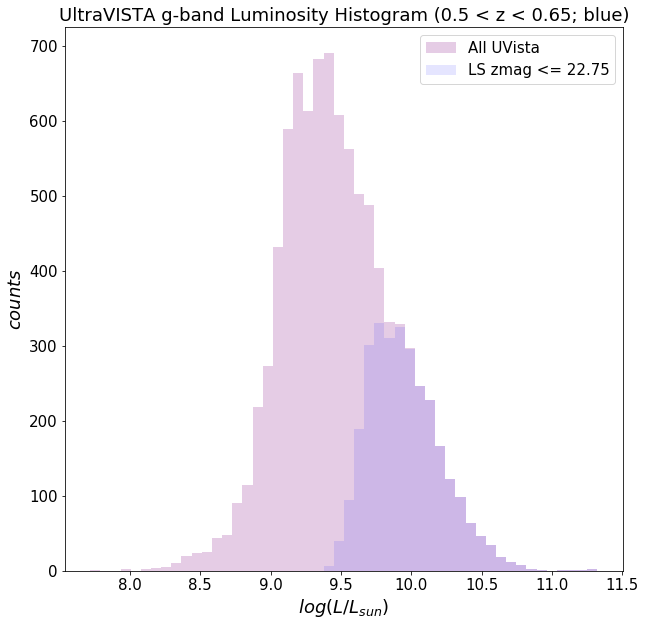

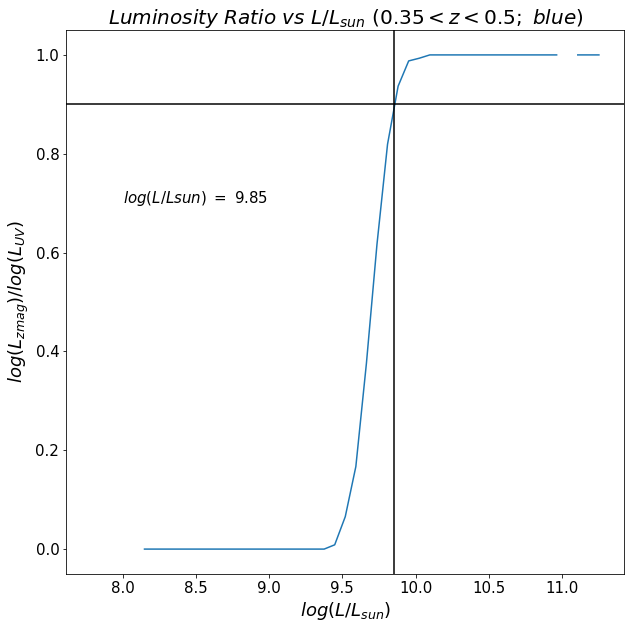

In [130]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_gLum_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_gLum_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum_blue_z, bins=zcut_bins_blue, alpha=0.2, color='purple', label="All UVista")
plt.hist(log_gLum_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="LS zmag <= 22.75")
plt.title("UltraVISTA g-band Luminosity Histogram (0.5 < z < 0.65; blue)", fontsize=18)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
plt.ylabel(r'$counts$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/high-luminosity-hist-blue.pdf')

plt.show()


# # 0.2 < z < 0.35
# bins_minus_one = [6.86548476,  6.9456327,   7.02578063,  7.10592857,  7.1860765,
#   7.26622443,  7.34637237,  7.4265203,   7.50666824,  7.58681617,  7.66696411,
#   7.74711204,  7.82725998,  7.90740791,  7.98755585,  8.06770378,  8.14785172,
#   8.22799965,  8.30814758,  8.38829552,  8.46844345,  8.54859139,  8.62873932,
#   8.70888726,  8.78903519,  8.86918313,  8.94933106,  9.029479,    9.10962693,
#   9.18977486,  9.2699228,   9.35007073,  9.43021867,  9.5103666,   9.59051454,
#   9.67066247,  9.75081041,  9.83095834,  9.91110628,  9.99125421, 10.07140215,
#  10.15155008, 10.23169801, 10.31184595, 10.39199388, 10.47214182, 10.55228975,
#  10.63243769, 10.71258562]

# # 0.35 < z < 0.5
# bins_minus_one = [7.58566245,  7.65462449,  7.72358653,  7.79254857,  7.8615106,
#   7.93047264,  7.99943468,  8.06839672,  8.13735876,  8.2063208,   8.27528284,
#   8.34424488,  8.41320691,  8.48216895,  8.55113099,  8.62009303,  8.68905507,
#   8.75801711,  8.82697915,  8.89594119,  8.96490323,  9.03386526,  9.1028273,
#   9.17178934,  9.24075138,  9.30971342,  9.37867546,  9.4476375,   9.51659954,
#   9.58556157,  9.65452361,  9.72348565,  9.79244769,  9.86140973,  9.93037177,
#   9.99933381, 10.06829585, 10.13725788, 10.20621992, 10.27518196, 10.344144,
#  10.41310604, 10.48206808, 10.55103012, 10.61999216, 10.6889542,  10.75791623,
#  10.82687827, 10.89584031]

# 0.5 < z < 0.65
bins_minus_one = [7.78917823,  7.8613075,   7.93343677,  8.00556604,  8.07769532,
  8.14982459,  8.22195386,  8.29408313,  8.3662124,   8.43834167,  8.51047095,
  8.58260022,  8.65472949,  8.72685876,  8.79898803,  8.8711173,   8.94324658,
  9.01537585,  9.08750512,  9.15963439,  9.23176366,  9.30389293,  9.37602221,
  9.44815148,  9.52028075,  9.59241002,  9.66453929,  9.73666856,  9.80879784,
  9.88092711,  9.95305638, 10.02518565, 10.09731492, 10.16944419, 10.24157347,
 10.31370274, 10.38583201, 10.45796128, 10.53009055, 10.60221982, 10.6743491,
 10.74647837, 10.81860764, 10.89073691, 10.96286618, 11.03499545, 11.10712473,
 11.179254,   11.25138327]


fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])

plt.axhline(y=0.9, color='black')
plt.axvline(x=9.85, color='black')
plt.title("$Luminosity$ $Ratio$ $vs$ $L/L_{sun}$ $(0.35 < z < 0.5;$ $blue)$", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=18)
plt.ylabel(r'$log(L_{zmag})/log(L_{UV})$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.text(8., 0.7, '$log(L/L{sun})$ $=$ $9.85$', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/PaperPlots/luminosity-histograms/high-lum_ratio-vs_lum-blue.pdf')
fig.show()


In [9]:
UV_zcut_all, zcut_bins_all = np.histogram(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_all-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_all-v3.pdf')
plt.show()

bins_minus_one = [7.72880458,  7.83848155,  7.94815852,  8.05783549,  8.16751245,
  8.27718942,  8.38686639,  8.49654336,  8.60622032,  8.71589729,  8.82557426,
  8.93525123,  9.0449282,   9.15460516,  9.26428213,  9.3739591,   9.48363607,
  9.59331303,  9.70299,     9.81266697,  9.92234394, 10.0320209,  10.14169787,
 10.25137484, 10.36105181, 10.47072877, 10.58040574, 10.69008271, 10.79975968,
 10.90943665, 11.01911361, 11.12879058, 11.23846755, 11.34814452, 11.45782148,
 11.56749845, 11.67717542, 11.78685239, 11.89652935, 12.00620632, 12.11588329,
 12.22556026, 12.33523723, 12.44491419, 12.55459116, 12.66426813, 12.7739451,
 12.88362206, 12.99329903]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_all-v3.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v3.pdf')
fig.show()

NameError: name 'zphot' is not defined

In [ ]:
log_LV_blue_LS = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]
log_LV_red_LS = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]

log_LV_blue_z = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65))]
log_LV_red_z = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65))]
   
    
print(len(log_LV_blue_LS))
print(len(log_LV_red_LS))
print(len(log_LV_blue_z))
print(len(log_LV_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_LV_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_LV_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_red_z, bins=zcut_bins_red, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_Normalized_red-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_Normalized_red-v2.pdf')
plt.show()

bins_minus_one = [7.75760615,  7.86669533,  7.97578451,  8.08487369,  8.19396287,
  8.30305205,  8.41214123,  8.52123041,  8.63031959,  8.73940877,  8.84849795,
  8.95758713,  9.06667632,  9.1757655,   9.28485468,  9.39394386,  9.50303304,
  9.61212222,  9.7212114,   9.83030058,  9.93938976, 10.04847894, 10.15756812,
 10.2666573,  10.37574648, 10.48483566, 10.59392484, 10.70301402, 10.81210321,
 10.92119239, 11.03028157, 11.13937075, 11.24845993, 11.35754911, 11.46663829,
 11.57572747, 11.68481665, 11.79390583, 11.90299501, 12.01208419, 12.12117337,
 12.23026255, 12.33935173, 12.44844092, 12.5575301,  12.66661928, 12.77570846,
 12.88479764, 12.99388682]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_red-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v3.pdf')
fig.show()

In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_LV_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_LV_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_blue_z, bins=zcut_bins_blue, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.pdf')
plt.show()

bins_minus_one = [7.69987978,  7.78063195,  7.86138412,  7.94213629,  8.02288846,
  8.10364063,  8.18439279,  8.26514496,  8.34589713,  8.4266493,   8.50740147,
  8.58815364,  8.66890581,  8.74965797,  8.83041014,  8.91116231,  8.99191448,
  9.07266665,  9.15341882,  9.23417098,  9.31492315,  9.39567532,  9.47642749,
  9.55717966,  9.63793183,  9.718684,    9.79943616,  9.88018833,  9.9609405,
 10.04169267, 10.12244484, 10.20319701, 10.28394917, 10.36470134, 10.44545351,
 10.52620568, 10.60695785, 10.68771002, 10.76846218, 10.84921435, 10.92996652,
 11.01071869, 11.09147086, 11.17222303, 11.2529752,  11.33372736, 11.41447953,
 11.4952317,  11.57598387]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v2.pdf')
fig.show()

In [ ]:
# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']
# z = data_cat['z_spec']

cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (zarr > 0.) & (use == 1))
cut0 = cut[0]
print(type(cut0))

gmag = 22.5 - 2.5 * np.log10(gp[cut])
rmag = 22.5 - 2.5 * np.log10(rp[cut])
zmag = 22.5 - 2.5 * np.log10(zp[cut])

zphot = zarr[cut]
# DMarr = np.array(DM)
DM_new = DMarr[cut]



In [ ]:
print(cut0.shape)
print(cut0)
print(cut0[2])

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct
# print(len(Mg))


# calculate rest-frame colors

# Lg = np.array(L_gfilter)
# Lr = np.array(L_rfilter)

# grcolor_LRG = -2.5*np.log10(Lg/Lr)
# print(grcolor_LRG)

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))
print(len(L_r))


In [ ]:
# plt.subplots(figsize=(10,10))
# plt.hist(np.log10(L_r), bins=50, alpha=0.5, color='indigo', label="UV 0.2 < z < 0.65")
# plt.title("UltraVISTA r-band Luminosity Histogram", fontsize=20)
# plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# # plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.pdf')
# plt.show()


plt.subplots(figsize=(10,10))
plt.hist(zphot, bins=50, alpha=0.5, color='indigo')
plt.title("UltraVISTA Redshift Histogram", fontsize=20)
plt.xlabel(r'$Redshift$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# plt.gca().invert_xaxis()
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.pdf')
plt.show()


In [ ]:
# same as previous cell but make redshift cuts

LS_cut = np.where((zphot >= 0.55) & (zphot <= 0.65) & (zmag <= 22.36))
# LRG_cut = np.where(zmag <= 22.36)

gmag_cut = gmag[LS_cut]
rmag_cut = rmag[LS_cut]
zmag_cut = zmag[LS_cut]

z_cut = zphot[LS_cut]
DM_cut = DM_new[LS_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))


In [ ]:
# same as previous cell but make redshift cuts

z_cut = np.where((zphot >= 0.55) & (zphot <= 0.65))
# LRG_cut = np.where(zmag <= 22.36)

gmag_zcut = gmag[z_cut]
rmag_zcut = rmag[z_cut]
zmag_zcut = zmag[z_cut]

z_zcut = zphot[z_cut]
DM_zcut = DM_new[z_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_zcut = -2.5*np.log10((1. + z_zcut)**(-1.))

Mr_zcut = rmag_zcut - DM_zcut - K_correct_zcut
print(len(Mr_zcut))


In [ ]:
plt.subplots(figsize=(10,10))
# plt.hist(Mr, bins=50, alpha=0.5, color='blue', label="Full UV")
plt.hist(Mr_zcut, bins=50, alpha=0.5, color='green', label="UV 0.55 < z < 0.65")
plt.hist(Mr_cut, bins=50, alpha=0.5, color='red', label="UV 0.55 < z < 0.65 with zmag cuts")
plt.title("UltraVISTA Absolute Magnitude Histogram", fontsize=20)
plt.xlabel(r'$M_{r}$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=12)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))


In [ ]:
# calculate the above using my project cuts: (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36)

LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65)) # & (zmag <= 22.36))

gmag_cut = gmag[LRG_cut]
rmag_cut = rmag[LRG_cut]
zmag_cut = zmag[LRG_cut]

z_cut = zphot[LRG_cut]
DM_cut = DM_new[LRG_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))



# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_cut = 10.**((Mr_cut-Msun_r)/(-2.5))

print(len(L_r_cut[np.where(L_r_cut == 0.)]))

In [ ]:
# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_zcut = 10.**((Mr_zcut-Msun_r)/(-2.5))

print(len(L_r_zcut[np.where(L_r_zcut == 0.)]))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


log_Lr = np.log10(L_r)
log_Lr_cut = np.log10(L_r_cut)
log_Lr_zcut = np.log10(L_r_zcut)

plt.subplots(figsize=(10,10))
plt.hist(log_Lr, bins=50, alpha=0.3, color='purple', label="0.2 < z < 0.65", normed='True')
# plt.hist(log_Lr_zcut, bins=50, alpha=0.3, color='green', label="UV with Redshift Cuts")
# plt.hist(log_Lr_cut, bins=50, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts", normed='True')
plt.title("UltraVISTA Luminosity Histogram (only LS redshift cut)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.pdf')
plt.show()


In [ ]:
UV_zcut, zcut_bins = np.histogram(log_Lr_zcut, bins=50)
UV_LScut, nouse_bins = np.histogram(log_Lr_cut, bins=zcut_bins)
print(zcut_bins)
print('----')
# print(LScut_bins)

ratio = UV_LScut/UV_zcut
print(ratio)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=50, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_zcut, bins=40, alpha=0.3, color='green', label="UV with Redshift Cuts")
plt.hist(log_Lr_cut, bins=zcut_bins, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66866755,  8.74495446,  8.82124137,  8.89752828,  8.97381518,
  9.05010209,  9.126389,    9.20267591,  9.27896282,  9.35524972,  9.43153663,
  9.50782354,  9.58411045,  9.66039736,  9.73668427,  9.81297117,  9.88925808,
  9.96554499, 10.0418319,  10.11811881, 10.19440572, 10.27069262, 10.34697953,
 10.42326644, 10.49955335, 10.57584026, 10.65212717, 10.72841407, 10.80470098,
 10.88098789, 10.9572748,  11.03356171, 11.10984861, 11.18613552, 11.26242243,
 11.33870934, 11.41499625, 11.49128316, 11.56757006, 11.64385697, 11.72014388,
 11.79643079, 11.8727177,  11.94900461, 12.02529151, 12.10157842, 12.17786533,
 12.25415224, 12.33043915]

fig, ax = plt.subplots(figsize=(10,10))
plt.axhline(y=0.9, color='red')
ax.plot(bins_minus_one, ratio[:-1])
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.pdf')
fig.show()

In [ ]:
log_Lr = np.log10(L_r)
log_Lr_zcut = np.log10(L_r_zcut)

f, ax = plt.subplots(figsize=(10,10))
ax.scatter(zphot, log_Lr, s=1, c='purple', label='Full UV')
ax.scatter(z_zcut, log_Lr_zcut, s=1, c='blue', label='UV with Redshift Cuts')
plt.title("UltraVISTA Luminosity in r-band vs redshift", fontsize=22)
plt.xlabel(r'$redshift$', fontsize=20)
plt.ylabel(r'$log(L_r/L_{sun,r})$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right', fontsize=15, markerscale=5)
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.pdf')
plt.show()

In [ ]:
# Schechter function????
import numpy as np

def schechter_luminosity_function(phistar, L, Lstar, alpha):
    return (phistar/Lstar) * (L/Lstar)**(alpha) * np.exp(-L/Lstar)

Lsun = 3.9e33
phistar = 0.008
Lstar = 1e10 * Lsun
alpha = -0.7

L = L_r * Lsun

L_cut = L_r_cut * Lsun

phi = schechter_luminosity_function(phistar, L, Lstar, alpha)
# print(L_r)
print(max(phi))
print(min(phi))
print(max(L_r))
print(min(L_r))
# print(Lstar)

phi_cut = schechter_luminosity_function(phistar, L_cut, Lstar, alpha)

In [15]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

from astropy.io import ascii
data1 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
lines1 = data1.readlines()[11:]

z1 = []
DM1 = []
LU1 = []
LV1 = []

for line in lines1:
    p = line.split()
    z1.append(float(p[1]))
    DM1.append(float(p[2]))
    LU1.append(float(p[5]))
    LV1.append(float(p[6]))
    
ztemp1 = np.array(z1)
DMtemp1 = np.array(DM1)
LUtemp1 = np.array(LU1)
LVtemp1 = np.array(LV1)

data2 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
lines2 = data2.readlines()[11:]

z2 = []
DM2 = []
LV2 = []
LJ = []

for line in lines2:
    p = line.split()
    z2.append(float(p[1]))
    DM2.append(float(p[2]))
    LV2.append(float(p[5]))
    LJ.append(float(p[6]))
    
ztemp2 = np.array(z2)
DMtemp2 = np.array(DM2)
LVtemp2 = np.array(LV2)
LJtemp = np.array(LJ)


data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")

gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']

print(len(gp))
print(len(LUtemp1))

262615
262615


In [19]:
# UltraVISTA apparent magnitudes

# cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.) &(use == 1))
# cut0 = cut[0]
# print(type(cut0))

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]


# cut1 = np.where((ztemp1 > 0.) & (LVtemp1 > 0.) & (LUtemp1 > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
# cut2 = np.where((ztemp2 > 0.) & (LVtemp2 > 0.) & (LJtemp > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
    
zarr1 = np.array(ztemp1[cut])
DMarr1 = np.array(DMtemp1[cut])
LUarr1 = np.array(LUtemp1[cut])
LVarr1 = np.array(LVtemp1[cut])
# zarr2 = np.array(ztemp2[cut])
DMarr2 = np.array(DMtemp2[cut])
LJarr = np.array(LJtemp[cut])
LVarr2 = np.array(LVtemp2[cut])

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]

# print(len(zarr))
# print(len(DMarr))
# print(len(LUarr))
# print(len(LVarr))
# print(len(Varr))



In [21]:
# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + zarr)**-1.)

# MV = Vmag - DMarr - K_correct
# MV2 = Vmag2 - DMarr - K_correct

# calculate rest-frame colors

UVcolor1 = -2.5*np.log10(LUarr1/LVarr1)
VJcolor1 = -2.5*np.log10(LVarr2/LJarr)
print(len(UVcolor))

166641


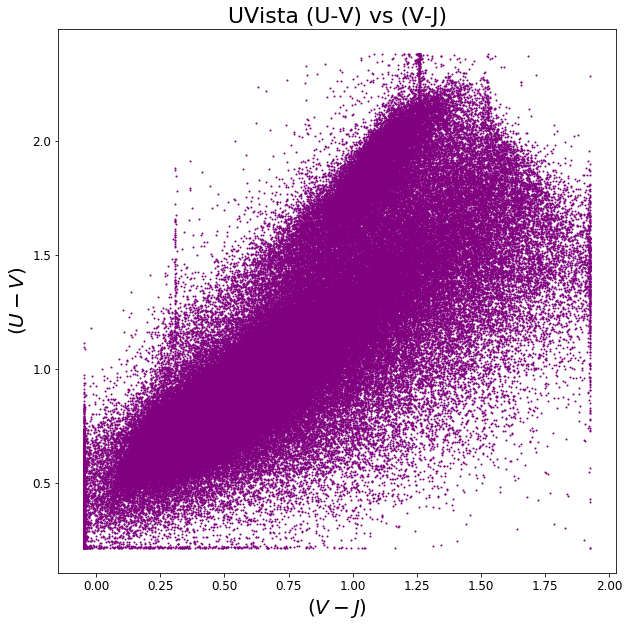

In [23]:
# Plot (U-V) vs. V

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where(zarr < 1.)], UVcolor[np.where(zarr < 1.)], s=1, c='purple')
# ax.scatter(VJcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], UVcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], s=1, c='purple')
ax.scatter(VJcolor1, UVcolor1, s=1, c='purple')
plt.title("UVista (U-V) vs (V-J)", fontsize=22)
plt.xlabel(r'$(V-J)$', fontsize=20)
plt.ylabel(r'$(U-V)$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.pdf')
plt.show()

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))

log_Lr_all = np.log10(L_r)
print(len(log_Lr_all))


In [ ]:
log_Lr_blue_LS = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]
log_Lr_red_LS = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]

log_Lr_blue_z = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
log_Lr_red_z = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
   
    
print(len(log_Lr_blue_LS))
print(len(log_Lr_red_LS))
print(len(log_Lr_blue_z))
print(len(log_Lr_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_Lr_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_Lr_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_red_z, bins=20, alpha=0.2, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66202823,  8.73167582,  8.8013234,   8.87097099,  8.94061858,
  9.01026616,  9.07991375,  9.14956134,  9.21920892,  9.28885651,  9.3585041,
  9.42815168,  9.49779927,  9.56744686,  9.63709444,  9.70674203,  9.77638962,
  9.8460372,   9.91568479,  9.98533238, 10.05497996, 10.12462755, 10.19427514,
 10.26392272, 10.33357031, 10.4032179,  10.47286548, 10.54251307, 10.61216066,
 10.68180824, 10.75145583, 10.82110342, 10.890751,   10.96039859, 11.03004618,
 11.09969376, 11.16934135, 11.23898894, 11.30863652, 11.37828411, 11.4479317,
 11.51757928, 11.58722687, 11.65687446, 11.72652204, 11.79616963, 11.86581722,
 11.9354648,  12.00511239]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.pdf')
fig.show()


In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_Lr_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_Lr_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_blue_z, bins=50, alpha=0.3, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_blue_LS, bins=zcut_bins_blue, alpha=0.2, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.99501123,  9.06463806,  9.13426489,  9.20389173,  9.27351856,
  9.34314539,  9.41277222,  9.48239906,  9.55202589,  9.62165272,  9.69127956,
  9.76090639,  9.83053322,  9.90016006,  9.96978689, 10.03941372, 10.10904056,
 10.17866739, 10.24829422, 10.31792106, 10.38754789, 10.45717472, 10.52680156,
 10.59642839, 10.66605522, 10.73568206, 10.80530889, 10.87493572, 10.94456256,
 11.01418939, 11.08381622, 11.15344306, 11.22306989, 11.29269672, 11.36232356,
 11.43195039, 11.50157722, 11.57120406, 11.64083089, 11.71045772, 11.78008456,
 11.84971139, 11.91933822, 11.98896506, 12.05859189, 12.12821872, 12.19784556,
 12.26747239, 12.33709922]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.pdf')
fig.show()